In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
%matplotlib widget
from ipywidgets import widgets

In [2]:
if os.getcwd() != "C:\\Users\\Lawrence\\csv-05092023_VF1-TB\\csv":
    os.chdir("C:\\Users\\Lawrence\\csv-05092023_VF1-TB\\csv")
    print("changed path to: " + os.getcwd())
else:
    print(os.getcwd())

changed path to: C:\Users\Lawrence\csv-05092023_VF1-TB\csv


In [3]:
filelist = []
for file in os.listdir():
    filelist.append(file)
print(filelist)

['Run1_1Hz_SingleBedCenter_MiddleArmInSoil.csv', 'Run2_1Hz_FullCenterBedInSoil.csv', 'Run3_1Hz_AllBedInSoil.csv', 'Run4_2Hz_AllBedInSoil.csv', 'Run5_2Hz_Repeat4_SameBed.csv', 'Run6_3Hz_NewBed.csv', 'Run7_3Hz_NewBed_OuterBeds.csv', 'Run7_3Hz_NewBed_OuterBeds.xlsx']


In [4]:
dfAll = []
for i in range(0, len(filelist)-1):
    df = pd.read_csv(filelist[i], encoding='UTF-8')
    dfAll.append(df[["Time", "TracDragL_N", "TracDragR_N"]])
    print(i)


0
1
2
3
4
5
6


In [5]:
def starttrig(df, trig):
    start = df[df["TracDragR_N"] > trig].index[0]
    return(df[start-1000:])



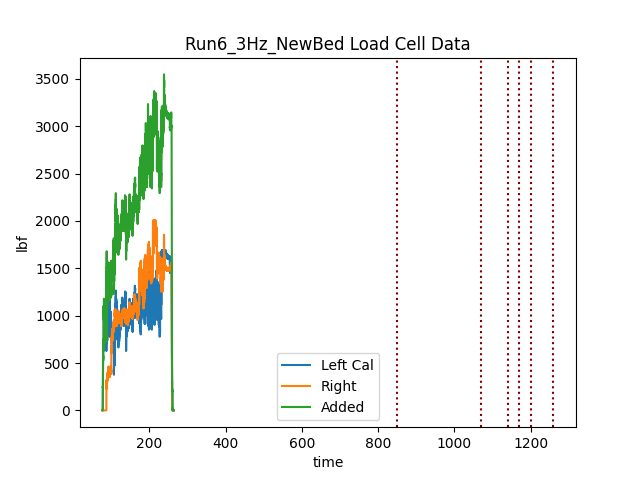

In [15]:
choose = 5
nt2lbf = 0.224809

df = dfAll[choose]
df["TracDragL_N_cal"] = df["TracDragL_N"] -np.average(df["TracDragL_N"][100:200])
df["Added_cal"] = (df["TracDragL_N_cal"]+df["TracDragR_N"])*nt2lbf

df = starttrig(df, 200)


fig, ax = plt.subplots()
trig = 200


#ax.plot(df["Time"], df["TracDragL_N"]*nt2lbf,  label = "Left")
ax.plot(df["Time"], df["TracDragL_N_cal"]*nt2lbf,  label = "Left Cal")
ax.plot(df["Time"], df["TracDragR_N"]*nt2lbf,  label = "Right")
ax.plot(df["Time"], df["Added_cal"],  label = "Added")

ax.axvline(850, linestyle = ":", color = "maroon")
ax.axvline(1070, linestyle = ":", color = "maroon")
ax.axvline(1140, linestyle = ":", color = "maroon")
ax.axvline(1170, linestyle = ":", color = "maroon")
ax.axvline(1200, linestyle = ":", color = "maroon")
ax.axvline(1260, linestyle = ":", color = "maroon")


ax.set_title(filelist[choose][:-4] + " Load Cell Data")
ax.set_xlabel("time")
ax.set_ylabel("lbf")
ax.legend()

In [99]:
samplerate = 100
windows0 = np.multiply([950,1070, 1140,1170, 1200, 1260], samplerate)
windows1 = np.multiply([445,530, 540,620, 680, 715], samplerate)
windows2 = np.multiply([176,240, 267,314, 322, 365], samplerate)
windows3 = np.multiply([270,370, 410,442, 455, 495], samplerate)
windows4 = np.multiply([150,210, 215,270, 280, 300], samplerate)
windows5 = np.multiply([90,150, 170,210, 225, 238], samplerate)
windows6 = np.multiply([50,100, 120,173, 195, 223], samplerate)

windows = [windows0, windows1, windows2, windows3, windows4, windows5, windows6]


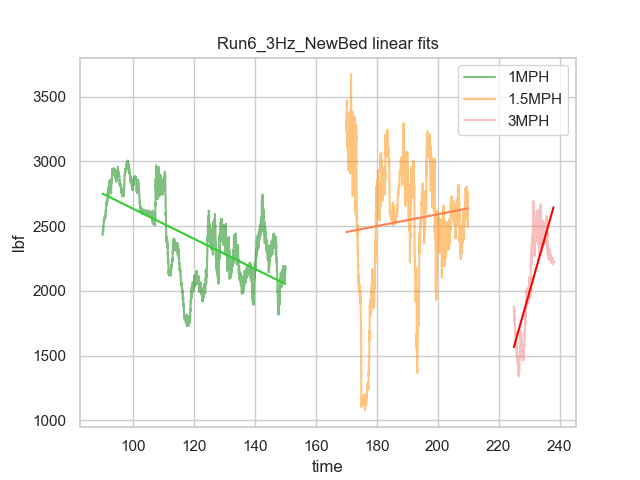

In [100]:
fig, ax = plt.subplots()

windowss = windows[choose]

sect1 = df.loc[windowss[0]:windowss[1]]
ax.plot(sect1["Time"], sect1["Added_cal"], color = "green", alpha = 0.5, label = "1MPH")
b, a = np.polyfit(range(0, len(sect1["Added_cal"])), sect1["Added_cal"], deg=1)
ax.plot(sect1["Time"], a + b * range(0, len(sect1["Added_cal"])), color = "limegreen")

sect2 = df.loc[windowss[2]:windowss[3]]
ax.plot(sect2["Time"], sect2["Added_cal"], color = "darkorange", alpha = 0.5, label = "1.5MPH")
b, a = np.polyfit(range(0, len(sect2["Added_cal"])), sect2["Added_cal"], deg=1)
ax.plot(sect2["Time"], a + b * range(0, len(sect2["Added_cal"])), color = "coral")


sect3 = df.loc[windowss[4]:windowss[5]]
ax.plot(sect3["Time"], sect3["Added_cal"], color = "lightcoral", alpha = 0.5, label = "3MPH")
b, a = np.polyfit(range(0, len(sect3["Added_cal"])), sect3["Added_cal"], deg=1)
ax.plot(sect3["Time"], a + b * range(0, len(sect3["Added_cal"])), color = "red")

ax.set_title(filelist[choose][:-4] + " linear fits")
ax.set_xlabel("time")
ax.set_ylabel("lbf")
ax.legend()


[ 95000 107000 114000 117000 120000 126000]
[44500 53000 54000 62000 68000 71500]
[17600 24000 26700 31400 32200 36500]
[27000 37000 41000 44200 45500 49500]
[15000 21000 21500 27000 28000 30000]
[ 9000 15000 17000 21000 22500 23800]
[ 5000 10000 12000 17300 19500 22300]


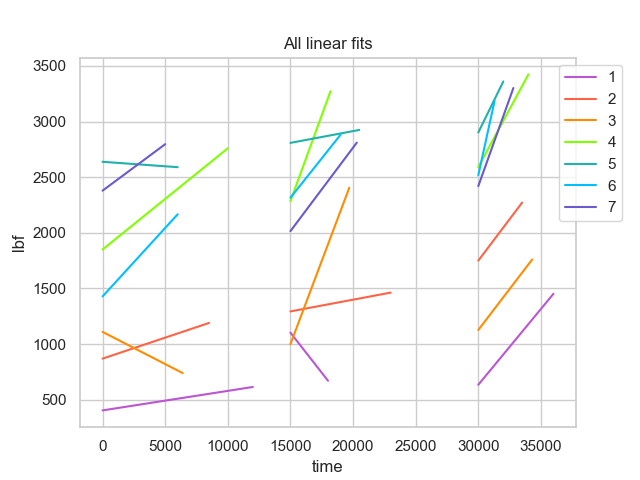

In [101]:
fig, ax = plt.subplots()
colors = ["tomato" ,  "darkorange" , "chartreuse", "lightseagreen", "deepskyblue", "slateblue", "mediumorchid"]
for i in range(0, len(windows)):
    df = dfAll[i]
    windowss = windows[i]
    print(windowss)
    color = colors[i-1]
    sect1 = df.loc[windowss[0]:windowss[1]]
    #ax.plot(sect1["Time"], sect1["Added_cal"], alpha = 0.5, label = "")
    b, a = np.polyfit(range(0, len(sect1["Added_cal"])), sect1["Added_cal"], deg=1)
    ax.plot(range(0, len(sect1["Added_cal"])), a + b * range(0, len(sect1["Added_cal"])), color = color, label = i+1)

    sect2 = df.loc[windowss[2]:windowss[3]]
    #ax.plot(sect2["Time"], sect2["Added_cal"], alpha = 0.5, label = "")
    b, a = np.polyfit(range(0, len(sect2["Added_cal"])), sect2["Added_cal"], deg=1)
    ax.plot(range(15000, len(sect2["Added_cal"])+15000), a + b * range(0, len(sect2["Added_cal"])), color = color)


    sect3 = df.loc[windowss[4]:windowss[5]]
    #ax.plot(sect3["Time"], sect3["Added_cal"], color = "lightcoral", alpha = 0.5, label = "")
    b, a = np.polyfit(range(0, len(sect3["Added_cal"])), sect3["Added_cal"], deg=1)
    ax.plot(range(30000, len(sect3["Added_cal"])+30000), a + b * range(0, len(sect3["Added_cal"])), color = color)

ax.set_title("All linear fits")
ax.set_xlabel("time")
ax.set_ylabel("lbf")
ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left')


[ 95000 107000 114000 117000 120000 126000]
[44500 53000 54000 62000 68000 71500]
[17600 24000 26700 31400 32200 36500]
[27000 37000 41000 44200 45500 49500]
[15000 21000 21500 27000 28000 30000]
[ 9000 15000 17000 21000 22500 23800]
[ 5000 10000 12000 17300 19500 22300]


Text(0, 0.5, 'Lbf')

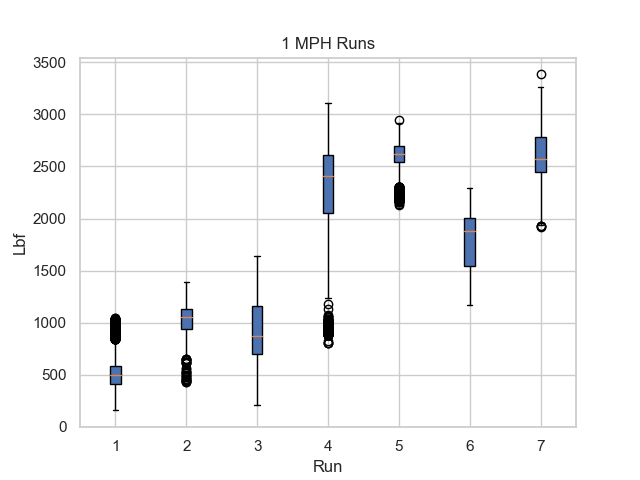

In [102]:
fig, ax = plt.subplots()
colors = ["tomato" ,  "darkorange" , "chartreuse", "lightseagreen", "deepskyblue", "slateblue", "mediumorchid"]
sns.set(style='whitegrid')
adds = []

for i in range(0, len(windows)):

    df = dfAll[i]
    windowss = windows[i]
    print(windowss)
    color = colors[i-1]
    sect1 = df.loc[windowss[0]:windowss[1]]
    bplot1 = ax.boxplot(sect1["Added_cal"], positions = [i+1], patch_artist = True)
    patch.set_facecolor(colors[i])

ax.set_title("1 MPH Runs")
ax.set_xlabel("Run")
ax.set_ylabel("Lbf")
        

[ 95000 107000 114000 117000 120000 126000]
[44500 53000 54000 62000 68000 71500]
[17600 24000 26700 31400 32200 36500]
[27000 37000 41000 44200 45500 49500]
[15000 21000 21500 27000 28000 30000]
[ 9000 15000 17000 21000 22500 23800]
[ 5000 10000 12000 17300 19500 22300]


Text(0, 0.5, 'Lbf')

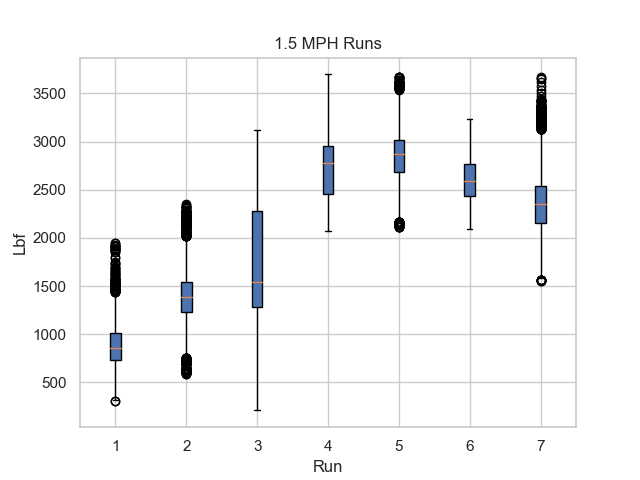

In [103]:
fig, ax = plt.subplots()
colors = ["tomato" ,  "darkorange" , "chartreuse", "lightseagreen", "deepskyblue", "slateblue", "mediumorchid"]
sns.set(style='whitegrid')
adds = []

for i in range(0, len(windows)):

    df = dfAll[i]
    windowss = windows[i]
    print(windowss)
    color = colors[i-1]
    sect2 = df.loc[windowss[2]:windowss[3]]
    bplot2 = ax.boxplot(sect2["Added_cal"], positions = [i+1], patch_artist = True)
    patch.set_facecolor(colors[i])

ax.set_title("1.5 MPH Runs")
ax.set_xlabel("Run")
ax.set_ylabel("Lbf")

[ 95000 107000 114000 117000 120000 126000]
[44500 53000 54000 62000 68000 71500]
[17600 24000 26700 31400 32200 36500]
[27000 37000 41000 44200 45500 49500]
[15000 21000 21500 27000 28000 30000]
[ 9000 15000 17000 21000 22500 23800]
[ 5000 10000 12000 17300 19500 22300]


Text(0, 0.5, 'Lbf')

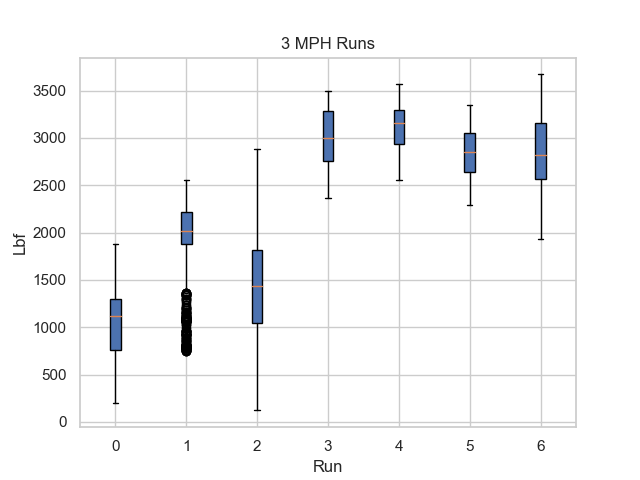

In [104]:
fig, ax = plt.subplots()
colors = ["tomato" ,  "darkorange" , "chartreuse", "lightseagreen", "deepskyblue", "slateblue", "mediumorchid"]
sns.set(style='whitegrid')
adds = []

for i in range(0, len(windows)):

    df = dfAll[i]
    windowss = windows[i]
    print(windowss)
    color = colors[i-1]
    sect3 = df.loc[windowss[4]:windowss[5]]
    bplot3 = ax.boxplot(sect3["Added_cal"], positions = [i], patch_artist = True)
    patch.set_facecolor(colors[i])

ax.set_title("3 MPH Runs")
ax.set_xlabel("Run")
ax.set_ylabel("Lbf")

In [105]:
print(sect1)

         Time  TracDragL_N  TracDragR_N  TracDragL_N_cal    Added_cal
5000    50.00      4180.10      7747.46          2787.00  2368.241418
5001    50.01      4180.10      7635.98          2787.00  2343.179711
5002    50.02      4180.10      7635.98          2787.00  2343.179711
5003    50.03      4180.10      7635.98          2787.00  2343.179711
5004    50.04      4180.10      7524.50          2787.00  2318.118004
...       ...          ...          ...              ...          ...
9996    99.96      6409.70      7413.02          5016.60  2794.290443
9997    99.97      6353.96      7413.02          4960.86  2781.759589
9998    99.98      6409.70      7413.02          5016.60  2794.290443
9999    99.99      6409.70      7413.02          5016.60  2794.290443
10000  100.00      6465.44      7413.02          5072.34  2806.821296

[5001 rows x 5 columns]


In [106]:

run1adds = (df0["TracDragL_N"]+df0["TracDragR_N"])*0.224809
run2adds = (df1["TracDragL_N"]+df1["TracDragR_N"])*0.224809
run3adds = (df2["TracDragL_N"]+df2["TracDragR_N"])*0.224809
run4adds = (df3["TracDragL_N"]+df3["TracDragR_N"])*0.224809
run5adds = (df4["TracDragL_N"]+df4["TracDragR_N"])*0.224809
run6adds = (df5["TracDragL_N"]+df5["TracDragR_N"])*0.224809
run7adds = (df6["TracDragL_N"]+df6["TracDragR_N"])*0.224809

run1addsRA = run1adds.rolling(window = 1000).mean()
run2addsRA = run2adds.rolling(window = 1000).mean()
run3addsRA = run3adds.rolling(window = 1000).mean()
run4addsRA = run4adds.rolling(window = 1000).mean()
run5addsRA = run5adds.rolling(window = 1000).mean()
run6addsRA = run6adds.rolling(window = 1000).mean()
run7addsRA = run7adds.rolling(window = 1000).mean()

ax.plot(range(0, len(run1addsRA[run1addsRA > 850])), run1addsRA[run1addsRA > 850], label = "Run1, 2 Act")
ax.plot(range(0, len(run2addsRA[run2addsRA > 350])), run2addsRA[run2addsRA > 350], label = "Run2, 6 Act")
ax.plot(range(0, len(run3addsRA[run3addsRA > 350])), run3addsRA[run3addsRA > 350], label = "Run3, 18 Act")
ax.plot(range(0, len(run4addsRA[run4addsRA > 350])), run4addsRA[run4addsRA > 350], label = "Run4, 18 Act")
ax.plot(range(0, len(run5addsRA[run5addsRA > 350])), run5addsRA[run5addsRA > 350], label = "Run5, 18 Act")
ax.plot(range(0, len(run6addsRA[run6addsRA > 350])), run6addsRA[run6addsRA > 350], label = "Run6, 18 Act")
ax.plot(range(0, len(run7addsRA[run7addsRA > 350])), run7addsRA[run7addsRA > 350], label = "Run7, 12 Act")


ax.title("Rolling averaging Runs, W=1000")
ax.legend()
ax.set_xlabel("samples")
ax.set_ylabel("lbf")

NameError: name 'df0' is not defined

Run1_1Hz_SingleBedCenter_MiddleArmInSoil.csv
Run2_1Hz_FullCenterBedInSoil.csv
Run3_1Hz_AllBedInSoil.csv
Run4_2Hz_AllBedInSoil.csv
Run5_2Hz_Repeat4_SameBed.csv
Run6_3Hz_NewBed.csv
Run7_3Hz_NewBed_OuterBeds.csv


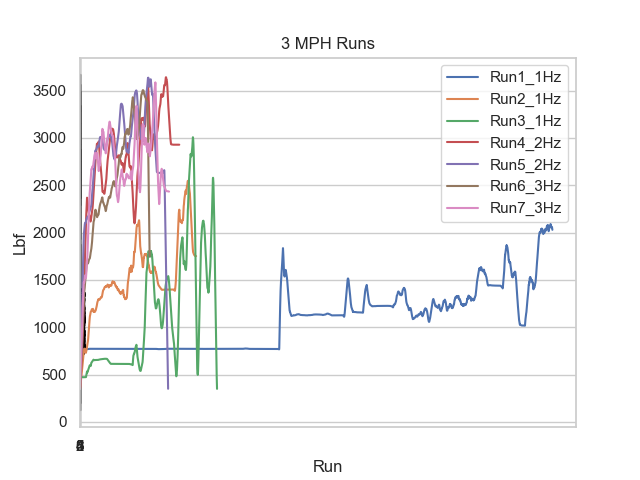

In [107]:


for i in range(0, len(filelist)-1):
    print(filelist[i])
    df = pd.read_csv(filelist[i])
    runadds = (df["TracDragL_N"]+df["TracDragR_N"])*0.224809
    runaddsRA = runadds.rolling(window = 1000).mean()
    plt.plot(range(0, len(runaddsRA[runaddsRA > 350])), runaddsRA[runaddsRA > 350], label = filelist[i][0:8])
    plt.legend()
plt.show()


Run1_1Hz_SingleBedCenter_MiddleArmInSoil.csv
Run2_1Hz_FullCenterBedInSoil.csv
Run3_1Hz_AllBedInSoil.csv
Run4_2Hz_AllBedInSoil.csv
Run5_2Hz_Repeat4_SameBed.csv
Run6_3Hz_NewBed.csv
Run7_3Hz_NewBed_OuterBeds.csv


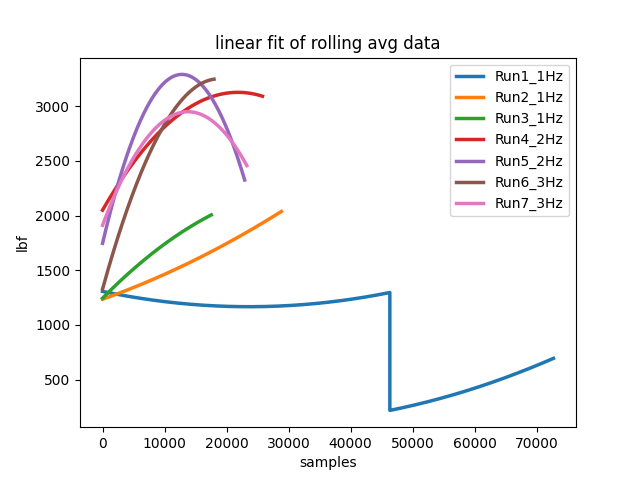

In [20]:
plt.close()
lines = []
for i in range(0, len(filelist)-1):
    print(filelist[i])
    df = pd.read_csv(filelist[i])
    runadds = (df["TracDragL_N"]+df["TracDragR_N"])*0.224809
    runaddsRA = runadds.rolling(window = 1000).mean()
    
    c, b, a = np.polyfit(range(0, len(runaddsRA[runaddsRA > 850])), runaddsRA[runaddsRA > 850], deg=2)
    #lines.append(a + b * range(0, len(runaddsRA[runaddsRA > 850])))
    lines.append(a + b * range(0, len(runaddsRA[runaddsRA > 850] )) + c * np.power(range(0, (len(runaddsRA[runaddsRA > 850]))), 2))
    plt.plot(range(0, len(runaddsRA[runaddsRA > 850])), a + b * range(0, len(runaddsRA[runaddsRA > 850] )) + c * np.power(range(0, (len(runaddsRA[runaddsRA > 850]))), 2) , label = filelist[i][0:8], lw=2.5)
    
    plt.legend()
plt.title("linear fit of rolling avg data")
plt.xlabel("samples")
plt.ylabel("lbf")
plt.show()


In [11]:
range(0, len(filelist))

range(0, 8)

In [12]:
diff = []
for i in range(0, len(lines[4])):
    diff.append(lines[4][i]-lines[1][i])
    
plt.plot(lines[4])
plt.plot(lines[1])
np.average(diff)

1344.838774933805